<a href="https://colab.research.google.com/github/HanniaMele/bedu-equipo4-dataScience-M4/blob/main/FinalProject_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final Fase 3 Módulo 4 BEDU

##Análisis de datos con Python - Equipo 4

###Integrantes: 
- Juan Manuel Ledesma Rangel
- Hannia Melendres Samaniego
- Alejandro Cortéz Sánchez
- Martín Otamendi Torres


---
##A. [Previo] Procesamiento de datos [MODIFICAR]

###A.1 Problema: [MODIFICAR]
> _x_

###A.2 Fundamento teórico del proyecto: [MODIFICAR]
> Se puede encontrar en orden en el siguiente documento de Google: _x_

###A.3 Planteamiento de preguntas [MODIFICAR]
Tras realizar la investigación preliminar, surgieron las siguientes preguntas (también encontradas dentro del documento comentado con anterioridad):

1.   _x_
2.   _x_
3.   _x_
4.   _x_
5.   _x_

### A.4 Colección de datos/AED/Limpieza

Para el análisis, utilizaremos los dataset (en formato .csv)...

>"credit_card_approvals_clean.csv"

obtenido desde https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?select=crx.csv, y encontrado en nuestro repositorio.

####A.4.1 Importación y AED

Realizamos un análisis exploratorio de datos para conocerlos.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/HanniaMele/bedu-equipo4-dataScience-M4/main/raw_data/credit_card_approvals_clean.csv")

df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [2]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [3]:
df.shape

(690, 16)

####A.4.2 Mapping e indexación de filas

In [4]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

Observamos las columnas y notamos que estás no tienen el formato `snake_case`, por lo que realizamos mapping.

In [5]:
df = df.rename({"Gender": "gender",
            "Age": "age",
            "Debt": "debt",
            "Married": "married",
            "BankCustomer": "bank_customer",
            "Industry": "industry",
            "Ethnicity": "ethnicity",
            "YearsEmployed": "years_employed",
            "PriorDefault": "prior_default",
            "Employed": "employed",
            "CreditScore": "credit_score",
            "DriversLicense": "driver_license",
            "Citizen": "citizen",
            "ZipCode": "zip_code",
            "Income": "income",
            "Approved": "approved"},
            axis = 1)

df.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


####A.4.3 NaNs

Buscamos nans con la función `.isna()`.

In [6]:
df.isna().sum(axis=0)

gender            0
age               0
debt              0
married           0
bank_customer     0
industry          0
ethnicity         0
years_employed    0
prior_default     0
employed          0
credit_score      0
driver_license    0
citizen           0
zip_code          0
income            0
approved          0
dtype: int64

Nuestros datos están **limpios**.

####A.4.4 Tipos de datos

Verificamos tipos de datos con `.dtypes`.

In [7]:
df.dtypes

gender              int64
age               float64
debt              float64
married             int64
bank_customer       int64
industry           object
ethnicity          object
years_employed    float64
prior_default       int64
employed            int64
credit_score        int64
driver_license      int64
citizen            object
zip_code            int64
income              int64
approved            int64
dtype: object

Nuestros datos están correctamente tipeados y **listos para usarse**.

---
##B. Estimados de locación y variabilidad - Postwork 1

###B.1 Datos estructurados
Visualizamos `.head()` de nuestro dataset nuevamente...

In [8]:
df.head()

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


y notamos que contamos tanto con `variables cualitativas` como `variables cuantitativas`.

####B.1.1 Datos cualitativos no binarios

Tras analizar e investigar la fuente de nuestro dataset, determinamos que hay dos tipos de datos categóricos (no binarios)...

- Aquellos con valores textuales (strings):

In [9]:
df[["industry", "ethnicity", "citizen"]].dtypes

industry     object
ethnicity    object
citizen      object
dtype: object

- Aquellos con valores numéricos:

In [10]:
df[["credit_score", "zip_code"]].dtypes

credit_score    int64
zip_code        int64
dtype: object

Para el caso de `zip_code`, sus valores determinan cierta zona geográfica. En cambio, para `credit_score`, sus valores indican el puntaje crediticio obtenido según reportes anteriores a la solicitud de tarjeta de crédito de este dataset. 

Los bancos (y otras empresas como aquellas de tiendas departamentales) cuentan con su rango de puntaje crediticio que van otorgando a sus clientes según corresponda. Por ende, este último ya tiene un rango establecido desde mucho antes, convirtiéndolo en una variable categórica a pesar de contar con valores numéricos.

Sus valores para este dataset son:

In [11]:
np.unique(df["credit_score"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 20, 23, 40, 67])

####B.1.2 Datos cualitativos binarios

Solo por la visualización del `.head()`, podemos suponer cuáles de nuestras columnas contienen datos binarios. Sin embargo, lo comprobaremos con la función `np.unique()`.

In [12]:
#Columna gender
print(f"Para 'gender':")
print(np.unique(df["gender"]))
print("\n")

#Columna married
print(f"Para 'married':")
print(np.unique(df["married"]))
print("\n")

#Columna bank_customer
print(f"Para 'bank_customer':")
print(np.unique(df["bank_customer"]))
print("\n")

#Columna prior_default
print(f"Para 'prior_default':")
print(np.unique(df["prior_default"]))
print("\n")

#Columna employed
print(f"Para 'employed':")
print(np.unique(df["employed"]))
print("\n")

#Columna driver_license
print(f"Para 'driver_license':")
print(np.unique(df["driver_license"]))
print("\n")

#Columna approved
print(f"Para 'approved':")
print(np.unique(df["approved"]))
print("\n")

Para 'gender':
[0 1]


Para 'married':
[0 1]


Para 'bank_customer':
[0 1]


Para 'prior_default':
[0 1]


Para 'employed':
[0 1]


Para 'driver_license':
[0 1]


Para 'approved':
[0 1]




Y efectivamente, todas las columnas que sospechábamos de tipo binario, resultaron serlo.

####B.1.3 Datos cuantitativos

Nuestros datos cuantitativos son:

In [13]:
df[["age", "debt", "years_employed", "income"]].dtypes

age               float64
debt              float64
years_employed    float64
income              int64
dtype: object

###B.2 Estimados de locación
Con nuestros datos estructurados ya distinguidos, podemos proceder a conocerlos por medio de estadísticos y visualizaciones.

####B.2.1 Datos cuantitativos
La mayoría de estimados de locación o medidas de tendencia central se pueden realizar para datos cuantitativos. Así:

#####B.2.1.1 Media
Aplicamos `.mean()` a nuestros datos cuantitativos, para obtener el promedio.

In [14]:
#Columna age
print(f"Para columna 'age', la media es de {round(df['age'].mean(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la media es de {round(df['debt'].mean(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la media es de {round(df['years_employed'].mean(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la media es de {round(df['income'].mean(),2)}")
print("\n")

Para columna 'age', la media es de 31.51


Para columna 'debt', la media es de 4.76


Para columna 'years_employed', la media es de 2.22


Para columna 'income', la media es de 1017.39




#####B.2.1.2 Mediana
Aplicamos `.median()` a nuestros datos cuantitativos, para conocer el valor posicionado al centro.

In [15]:
#Columna age
print(f"Para columna 'age', la mediana es de {round(df['age'].median(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la mediana es de {round(df['debt'].median(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la mediana es de {round(df['years_employed'].median(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la mediana es de {round(df['income'].median(),2)}")
print("\n")

Para columna 'age', la mediana es de 28.46


Para columna 'debt', la mediana es de 2.75


Para columna 'years_employed', la mediana es de 1.0


Para columna 'income', la mediana es de 5.0




Aunque sencillos, estos dos datos ya nos están otorgando información interesante sobre nuestro dataset. Por ejemplo, para las columnas de age, debt y years_employed, entre la mediana y la media no parece haber una distinción tan severa, al menos no a primera vista. No obstante, la diferencia para la columna income es abismal, y puede indicarnos la existencia de datos atípicos.

#####B.2.1.3 Media truncada
[PREGUNTA PARA EL EQUIPO] ¿Creen que sea necesario hacer al menos una media truncada?

#####B.2.1.4 Desviación estándar
La desviación estándar nos permitirá identificar qué tan dispersos están nuestros datos. Para ello usamos la función `.std()`.

In [16]:
#Columna age
print(f"Para columna 'age', la desviación estándar es de {round(df['age'].std(), 2)}")
print("\n")

#Columna debt
print(f"Para columna 'debt', la desviación estándar es de {round(df['debt'].std(), 2)}")
print("\n")

#Columna years_employed
print(f"Para columna 'years_employed', la desviación estándar es de {round(df['years_employed'].std(),2)}")
print("\n")

#Columna age
print(f"Para columna 'income', la desviación estándar es de {round(df['income'].std(),2)}")
print("\n")

Para columna 'age', la desviación estándar es de 11.86


Para columna 'debt', la desviación estándar es de 4.98


Para columna 'years_employed', la desviación estándar es de 3.35


Para columna 'income', la desviación estándar es de 5210.1




Con este nuevo dato, definitivamente notamos que la columna de "income" es un caso interesante.

#####B.2.1.5 Estadísticos de orden
Usando los estadísticos de orden, conoceremos las dimensiones de los valores de nuestros datos, y completaremos nuestra imagen mental de las distribuciones que hemos ido recopilando hasta ahora. Usamos la función `.quantile()`.

####B.2.2 Datos cualitativos
Se utiliza la moda, `statistics.mode()`, para conocer el valor que más se repite de un conjunto de datos categóricos. Así:

#####B.2.2.1 No binarios

In [17]:
import statistics
print("De valor cadena:")

#Columna industry
print(f"Para columna 'industry', la moda es {statistics.mode(df['industry'])}")
print("\n")

#Columna ethnicity
print(f"Para columna 'ethnicity', la moda es {statistics.mode(df['ethnicity'])}")
print("\n")

#Columna citizen
print(f"Para columna 'citizen', la moda es {statistics.mode(df['citizen'])}")
print("\n")

#---------

print("De valor numérico:")

#Columna credit_score
print(f"Para columna 'credit_score', la moda es de {statistics.mode(df['credit_score'])}")
print("\n")

#Columna zip_code
print(f"Para columna 'zip_code', la moda es de {statistics.mode(df['zip_code'])}")
print("\n")

De valor cadena:
Para columna 'industry', la moda es Energy


Para columna 'ethnicity', la moda es White


Para columna 'citizen', la moda es ByBirth


De valor numérico:
Para columna 'credit_score', la moda es de 0


Para columna 'zip_code', la moda es de 0




#####B.2.2.2 Binarios

In [18]:
#Columna gender
print(f"Para columna 'gender', la moda es {statistics.mode(df['gender'])}")
print("\n")

#Columna married
print(f"Para columna 'married', la moda es {statistics.mode(df['married'])}")
print("\n")

#Columna bank_customer
print(f"Para columna 'bank_customer', la moda es {statistics.mode(df['bank_customer'])}")
print("\n")

#Columna prior_default
print(f"Para columna 'prior_default', la moda es de {statistics.mode(df['prior_default'])}")
print("\n")

#Columna employed
print(f"Para columna 'employed', la moda es de {statistics.mode(df['employed'])}")
print("\n")

#Columna driver_license
print(f"Para columna 'driver_license', la moda es de {statistics.mode(df['driver_license'])}")
print("\n")

#Columna approved
print(f"Para columna 'approved', la moda es de {statistics.mode(df['approved'])}")
print("\n")

Para columna 'gender', la moda es 1


Para columna 'married', la moda es 1


Para columna 'bank_customer', la moda es 1


Para columna 'prior_default', la moda es de 1


Para columna 'employed', la moda es de 0


Para columna 'driver_license', la moda es de 0


Para columna 'approved', la moda es de 0




---
## C. Introducción a visualización de datos: Visualizaciones  - Postwork 2


* Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
* Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df

,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [21]:
df.dtypes

gender              int64
age               float64
debt              float64
married             int64
bank_customer       int64
industry           object
ethnicity          object
years_employed    float64
prior_default       int64
employed            int64
credit_score        int64
driver_license      int64
citizen            object
zip_code            int64
income              int64
approved            int64
dtype: object

In [65]:
#Establecemos el estilo de la gráfica
sns.set_style("whitegrid") 

#Creamos una función que nos permitirá graficar todas mis boxplots 
def grafica_boxplots(df_numerico):
  tam = df_numerico.shape[1]

  fig, axis = plt.subplots(nrows=int(tam/2), ncols=int(tam/2), figsize=(16, 10), constrained_layout=True);

  ren = col = 0

  for (columnName, columnData) in df_numerico.iteritems():
    sns.boxplot(x=columnData.values, ax=axis[ren, col])
    axis[ren, col].set_title(f'Boxplot para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))

    col += 1

    if(col == int(tam/2)):
      col = 0
      ren += 1

  fig.suptitle('Boxplots para variables numéricas', fontsize=18)

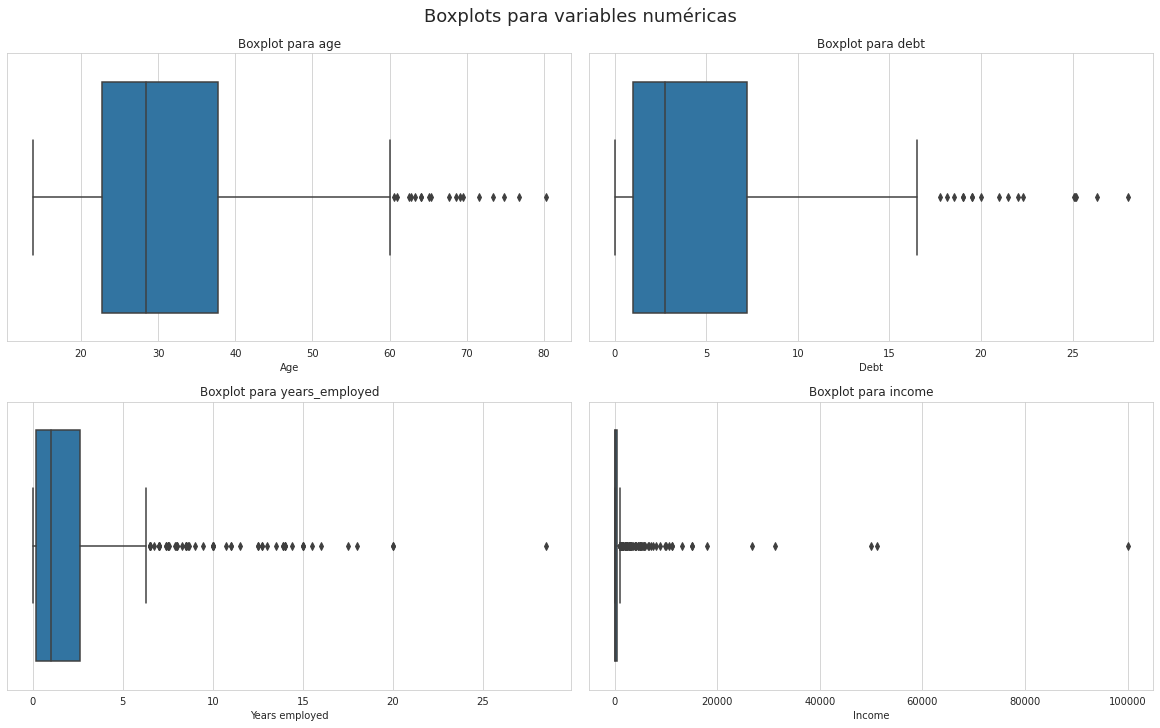

In [66]:
#Graficamos los boxplots
df_numerico = df[["age", "debt", "years_employed", "income"]]

grafica_boxplots(df_numerico)

In [24]:
#Observamos algunas estadísticas descriptivas de nuestros datos
describe_var_num = df_numerico.describe()
describe_var_num

,age,debt,years_employed,income
count,690.000000,690.000000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,1017.385507
std,11.860245,4.978163,3.346513,5210.102598
min,13.750000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.000000
50%,28.460000,2.750000,1.000000,5.000000
75%,37.707500,7.207500,2.625000,395.500000
max,80.250000,28.000000,28.500000,100000.000000


In [25]:
#Filtro de valores atípicos usando el score del rango intercuartílico

#Creamos una copia de mi dataframe original
df_copy = df.copy()

#Creamos una función para no repetir código
def filtro_siqr(serie_numerica):
  global df_copy

  iqr = serie_numerica.quantile(0.75) - serie_numerica.quantile(0.25)
  filtro_inferior = serie_numerica > serie_numerica.quantile(0.25) - (iqr * 1.5)
  filtro_superior = serie_numerica < serie_numerica.quantile(0.75) + (iqr * 1.5)

  df_copy = df_copy[filtro_inferior & filtro_superior]

In [26]:
#Filtramos 
df_numerico.apply(filtro_siqr, axis=0);

df_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,40.58,3.290,1,1,CommunicationServices,White,3.50,0,0,0,1,ByOtherMeans,400,0,0
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0


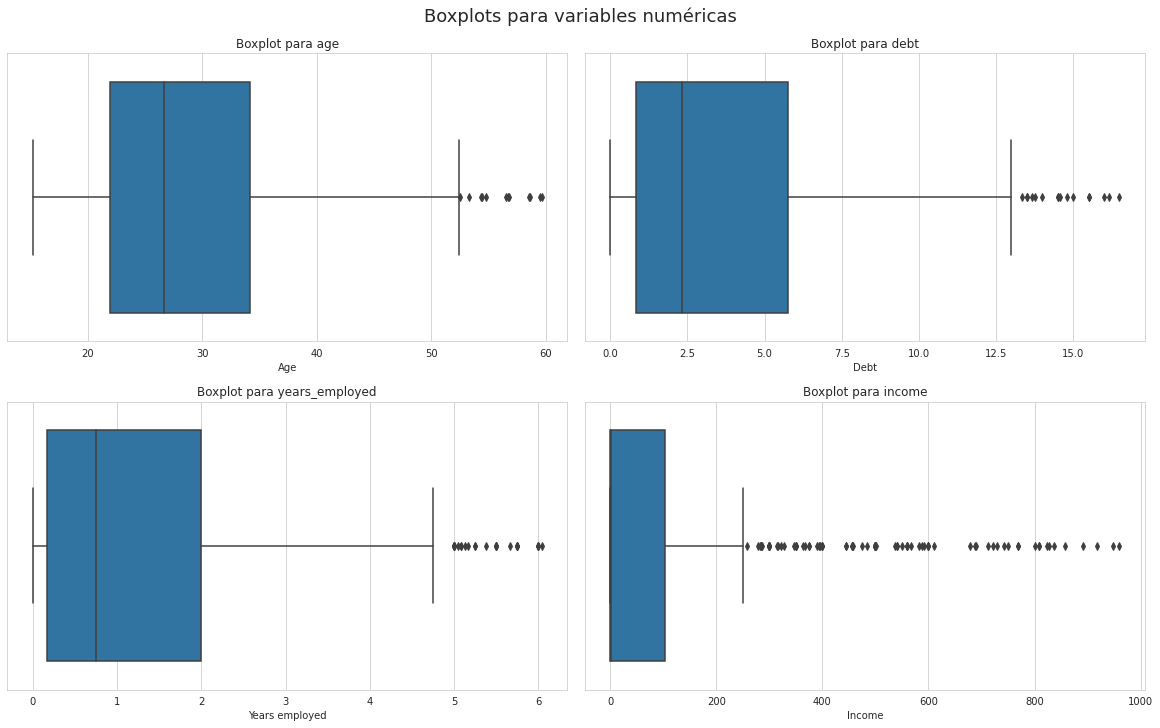

In [67]:
#Volvemos a graficar nuestras boxplots
grafica_boxplots(df_copy[list(df_numerico.columns)])

In [28]:
#Observamos algunas estadísticas descriptivas de nuestros datos luego de haber sido filtrados
describe_var_num = df_copy[list(df_numerico.columns)].describe()
describe_var_num

,age,debt,years_employed,income
count,519.000000,519.000000,519.000000,519.000000
mean,28.931541,3.978950,1.315424,105.319846
std,9.415928,4.091696,1.501684,204.876387
min,15.170000,0.000000,0.000000,0.000000
25%,21.920000,0.832500,0.165000,0.000000
50%,26.670000,2.335000,0.750000,1.000000
75%,34.125000,5.772500,2.000000,102.500000
max,59.670000,16.500000,6.040000,960.000000


In [29]:
arr_bins = pd.Series(dtype=int)

#Crear función para encontrar los segmentos de mis variables numéricas
def obten_segmentos(serie_numerica):
  global arr_bins
  
  #Regla de Sturge
  num_bins = int(1 + np.ceil(np.log2(len(serie_numerica))))
  arr_bins[serie_numerica.name] = num_bins

  print(serie_numerica.groupby(pd.cut(serie_numerica, num_bins)).count())
  print('\n')

In [30]:
#Generar tablas de frecuencias para las variables numericas 
df_copy[list(df_numerico.columns)].apply(obten_segmentos, axis=0);

age
(15.126, 19.215]     62
(19.215, 23.261]    119
(23.261, 27.306]     87
(27.306, 31.352]     78
(31.352, 35.397]     60
(35.397, 39.443]     36
(39.443, 43.488]     34
(43.488, 47.534]     15
(47.534, 51.579]     11
(51.579, 55.625]     10
(55.625, 59.67]       7
Name: age, dtype: int64


debt
(-0.0165, 1.5]    204
(1.5, 3.0]        103
(3.0, 4.5]         53
(4.5, 6.0]         35
(6.0, 7.5]         20
(7.5, 9.0]         13
(9.0, 10.5]        33
(10.5, 12.0]       27
(12.0, 13.5]       18
(13.5, 15.0]        8
(15.0, 16.5]        5
Name: debt, dtype: int64


years_employed
(-0.00604, 0.549]    245
(0.549, 1.098]        65
(1.098, 1.647]        52
(1.647, 2.196]        38
(2.196, 2.745]        34
(2.745, 3.295]        23
(3.295, 3.844]        16
(3.844, 4.393]        11
(4.393, 4.942]         8
(4.942, 5.491]        14
(5.491, 6.04]         13
Name: years_employed, dtype: int64


income
(-0.96, 87.273]       383
(87.273, 174.545]      30
(174.545, 261.818]     23
(261.818, 349.091]  

In [69]:
#Creamos histogramas para cada una de mis variables
#Generamos una función para construir mis histogramas
def grafica_histogramas(df_numerico):
  tam = df_numerico.shape[1]

  fig, axis = plt.subplots(nrows=int(tam/2), ncols=int(tam/2), figsize=(12, 10), constrained_layout=True);
  
  ren = col = 0

  for (columnName, columnData) in df_numerico.iteritems():
    sns.histplot(x=columnData.values, kde=False, bins=arr_bins[columnName], ax=axis[ren, col]);
    axis[ren, col].set_title(f'Histograma para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))

    col += 1

    if(col == int(tam/2)):
      col = 0
      ren += 1

  fig.suptitle('Histogramas para variables numéricas/cuantitativas', fontsize=18)

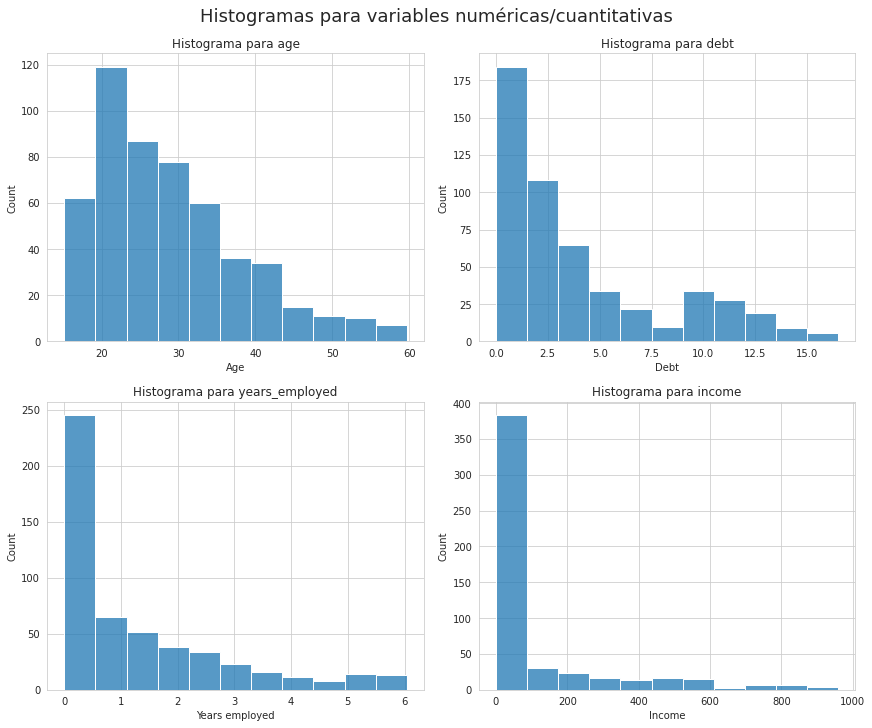

In [70]:
grafica_histogramas(df_copy[list(df_numerico.columns)])

In [33]:
#Obtener medidas de asimetría y curtosis
from scipy import stats
from scipy.stats import skew, kurtosis

#Generamos función para imprimir asimetría y curtosis de mis datos cuantitativos
def asm_cur(serie_numerica):
  print(f'Medidas para {serie_numerica.name}')
  print(f'Curtosis: {kurtosis(serie_numerica)}')
  print(f'Asimetría: {skew(serie_numerica)}\n')

In [34]:
df_copy[list(df_numerico.columns)].apply(asm_cur, axis=0);

Medidas para age
Curtosis: 0.4711144278586903
Asimetría: 0.9709682660972392

Medidas para debt
Curtosis: 0.17670306257774193
Asimetría: 1.1566770605062309

Medidas para years_employed
Curtosis: 1.0713420354790566
Asimetría: 1.3645151515580412

Medidas para income
Curtosis: 4.076360204419746
Asimetría: 2.1896738330259207



In [71]:
#Generamos gráficas de densidad utilizando categorías
#Creamos una función que nos permita graficar densidades por categoría apiladas
def grafica_densidad_completa(df_completo, columna, categoria):
  
  fig, axis = plt.subplots(figsize=(12, 10));
  sns.kdeplot(df_completo[columna], shade=True, hue=categoria, ax=axis);

  fig.suptitle(f'Gráfica de densidad para {columna} segmentado por {categoria.name}', fontsize=18)

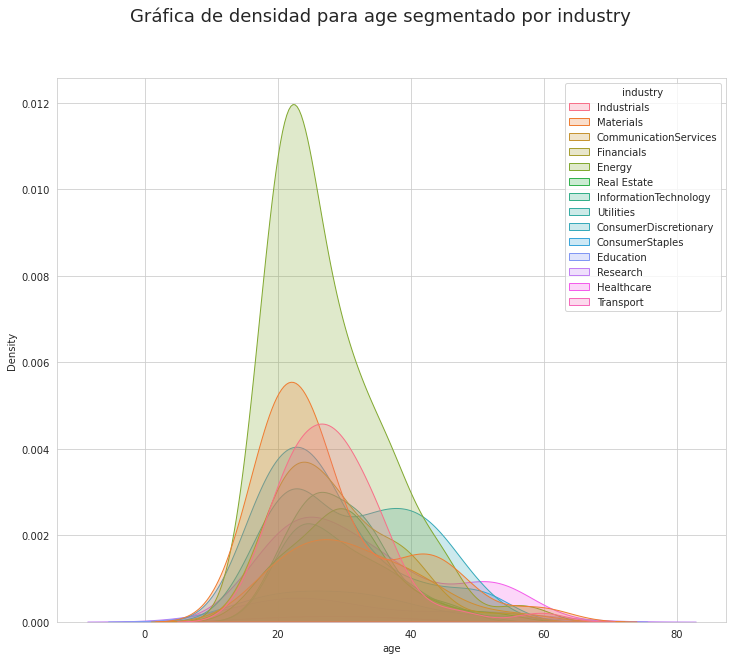

In [72]:
grafica_densidad_completa(df_copy, 'age', df_copy['industry'])

In [86]:
#Creamos una función que nos permita graficar densidades por categoría separadas
def grafica_densidad_individual(df_completo, columna, categoria):
  g = sns.FacetGrid(df_completo, col=categoria.name, col_wrap=4, aspect=2);
  g.map(sns.kdeplot, columna);
  g.fig.subplots_adjust(top=0.9)
  g.fig.suptitle(f'Gráfica de densidad para {columna} segmentado por {categoria.name}', fontsize=18)

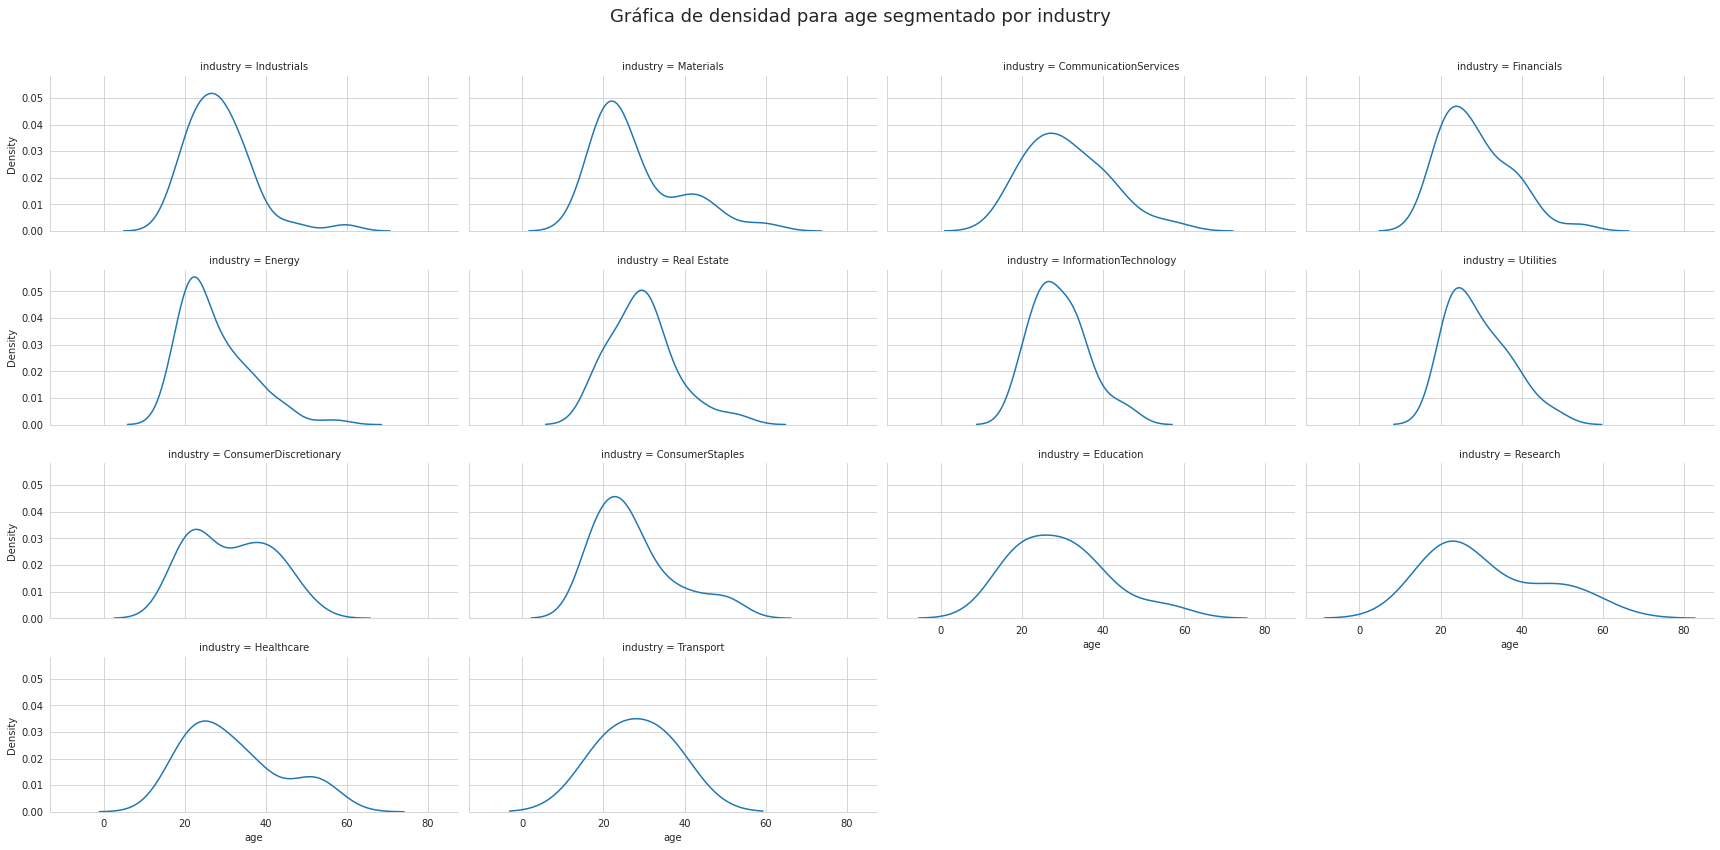

In [87]:
grafica_densidad_individual(df_copy, 'age', df_copy['industry'])

---
##D. Exploración de variables categóticas y análisis multivariable - Postwork 3


En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. 

* Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
* Identifica todas las variables categóricas en tu dataset.
* Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
* Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
* Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
* Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.

In [117]:
#Obtener variables categóricas de mi dataset
category_list = list(set(list(df_copy.columns)).difference(list(df_numerico.columns)))

df_categorico_filtrado = df_copy[category_list]

#Se remueve credit_score y zip_code también
category_list = list(set(list(df_categorico_filtrado.columns)).difference(['zip_code', 'credit_score']))
df_categorico_filtrado = df_categorico_filtrado[category_list]

df_categorico_filtrado

,bank_customer,ethnicity,gender,citizen,prior_default,married,industry,employed,driver_license,approved
0,1,White,1,ByBirth,1,1,Industrials,1,0,1
1,1,Black,0,ByBirth,1,1,Materials,1,0,1
2,1,Black,0,ByBirth,1,1,Materials,0,0,1
3,1,White,1,ByBirth,1,1,Industrials,1,1,1
4,1,White,1,ByOtherMeans,1,1,Industrials,0,0,1
...,...,...,...,...,...,...,...,...,...,...
684,1,White,1,ByOtherMeans,0,1,CommunicationServices,0,1,0
685,0,Black,1,ByBirth,0,0,Education,0,0,0
686,1,White,0,ByBirth,0,1,Energy,1,1,0
687,0,Latino,0,ByBirth,0,0,Healthcare,1,1,0


In [141]:
#Crear gráficas de barras para conocer distribución de mis variables categóricas
#Generamos una función para construir mis gráficas de barras
def grafica_histogramas(df_categorico):
  tam = df_categorico.shape[1]

  r = 2
  c = 5

  fig, axis = plt.subplots(nrows=r, ncols=c, figsize=(24, 14), constrained_layout=True);
  
  ren = col = 0

  for (columnName, columnData) in df_categorico.iteritems():
    counts = columnData.value_counts()
    sns.barplot(x=counts.index, y=counts, ax=axis[ren, col]);
    axis[ren, col].set_title(f'Gráfica de barras para {columnName}')
    axis[ren, col].set_xlabel(columnName.capitalize().replace('_', ' '))
    if(len(counts.index) > 2):
      axis[ren, col].tick_params('x', labelrotation=90)

    col += 1

    if(col == c):
      col = 0
      ren += 1

  fig.suptitle('Gráficas de barras para variables categóricas', fontsize=18)

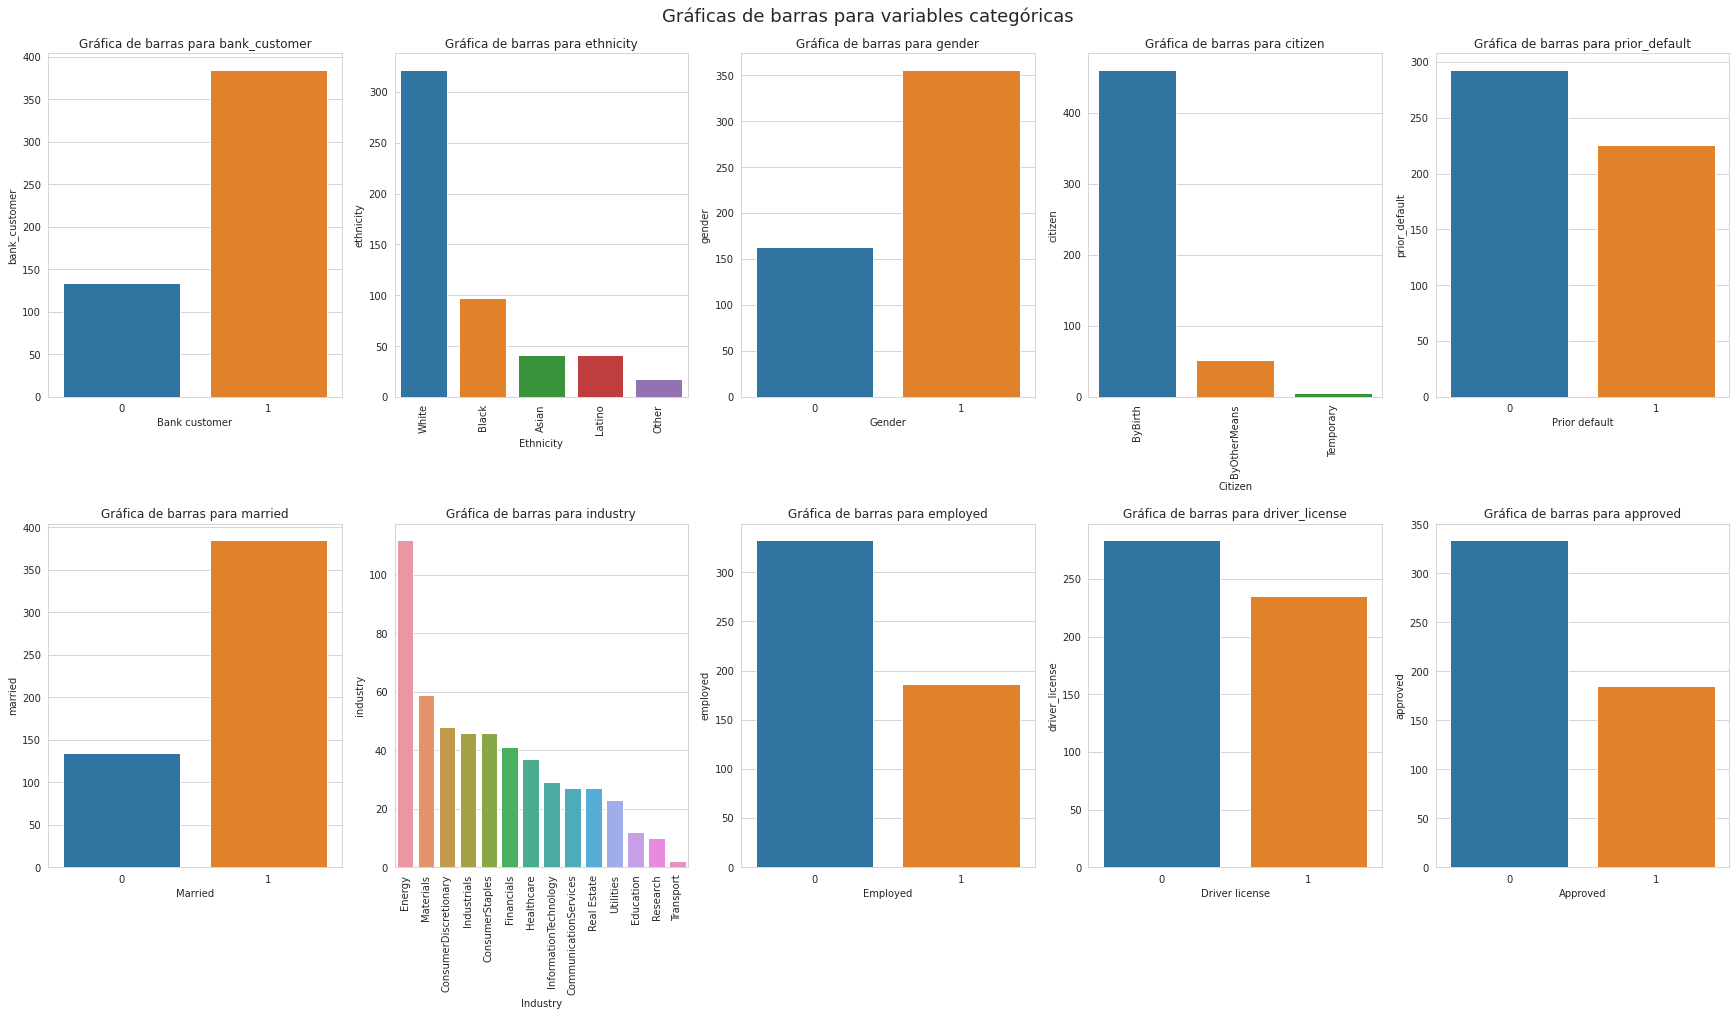

In [142]:
grafica_histogramas(df_categorico_filtrado)

In [179]:
#Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
#Crear función para poder generar tablas de contingencia y gráficas a partir de un par de variables categóricas
def contin_graf(df_categorico, var1, var2):
  crosstab = pd.crosstab(df_categorico[var1], df_categorico[var2])
  print(f'Tabla de contingencia para {var1} y {var2}')
  display(crosstab)

  ele_uni = df_categorico_filtrado['ethnicity'].unique()

  c = int(np.ceil(len(ele_uni)/2))
  r = c - 1

  fig, axes = plt.subplots(nrows = r, ncols = c, figsize=(24, 14), sharex=True, sharey=True)

  ren = col = 0

  for cat in ele_uni:
    sns.barplot(x=crosstab.columns, y=crosstab.loc[cat], ax=axes[ren, col])
    axes[ren, col].set(xlabel='', ylabel='', title=f'{var2.capitalize()} con {var1} {cat.lower()}')

    col += 1

    if(col == c):
      col = 0
      ren += 1

  fig.suptitle(f'Gráficas de barras de {var2} separados por {var1}', fontsize=18);

Tabla de contingencia para ethnicity y married


married,0,1
ethnicity,,
Asian,7,34
Black,25,72
Latino,18,23
Other,6,12
White,78,244


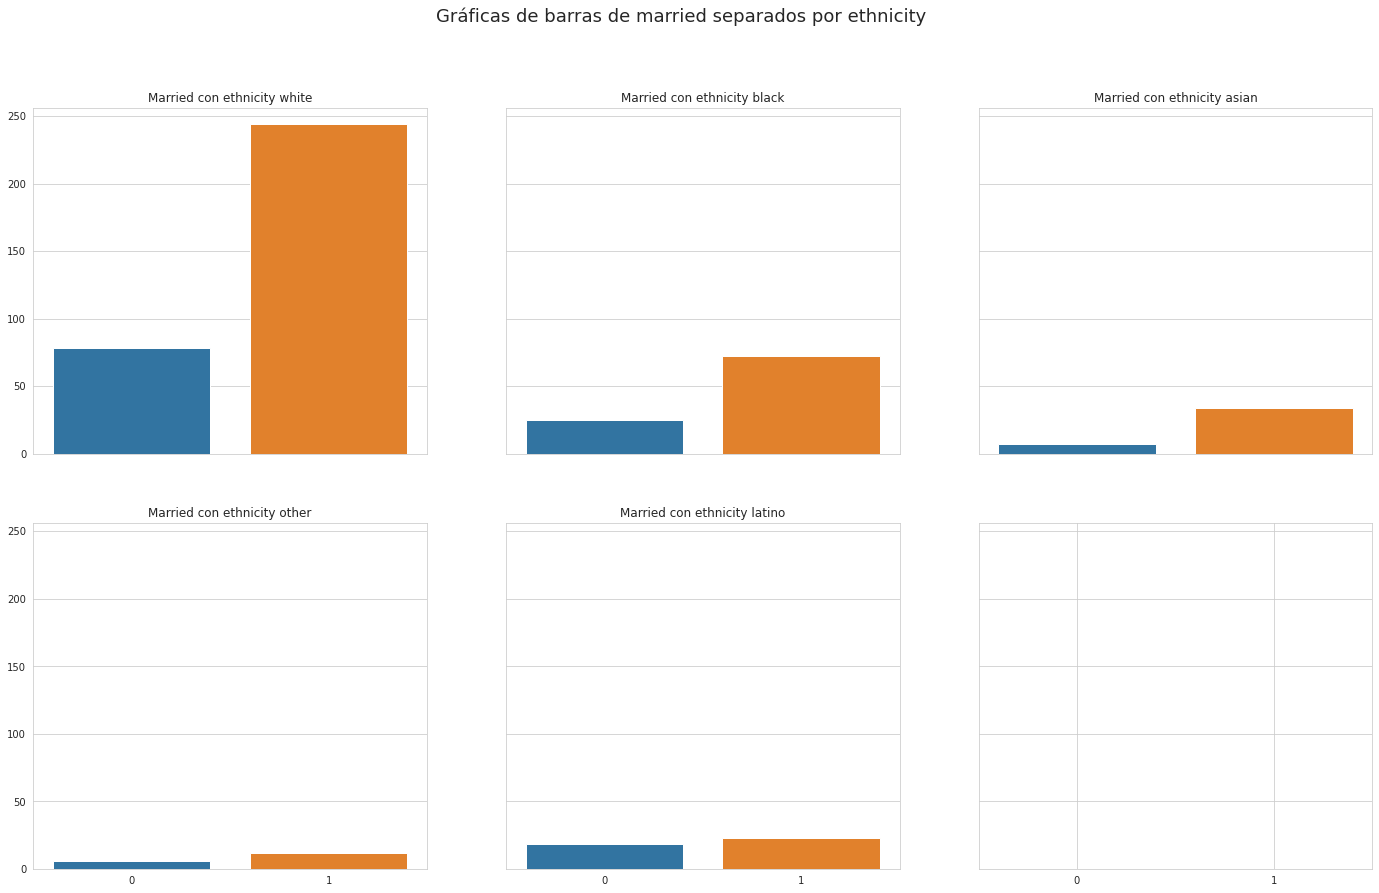

In [180]:
contin_graf(df_categorico_filtrado, 'ethnicity', 'married')

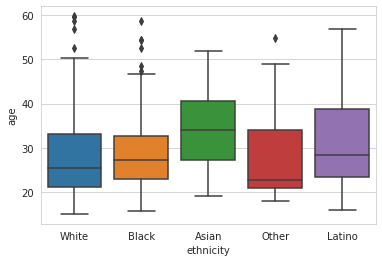

In [190]:
sns.boxplot(data=df_copy, x='ethnicity', y='age');

In [195]:
#Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
#Generar función para poder crear boxplot, violinplot y su combinación por renglón de variables categóricas 
def create_box_violin_plots(df_completo, var_num, var_cat):

  fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize=(24, 14), sharex=True, sharey=True, constrained_layout=True)  

  sns.boxplot(data=df_completo, x=var_cat, y=var_num, ax=axis[0]);
  axis[0].set_title('Boxplot')

  sns.violinplot(data=df_completo, x=var_cat, y=var_num, ax=axis[1]);
  axis[1].set_title('Violinplot')
  
  sns.boxplot(data=df_completo, x=var_cat, y=var_num, ax=axis[2]);
  sns.violinplot(data=df_completo, x=var_cat, y=var_num, ax=axis[2]);
  axis[2].set_title('Boxplot y violinplot')

  fig.suptitle(f'Box y violin plots de {var_num} separado por {var_cat}', fontsize=18);

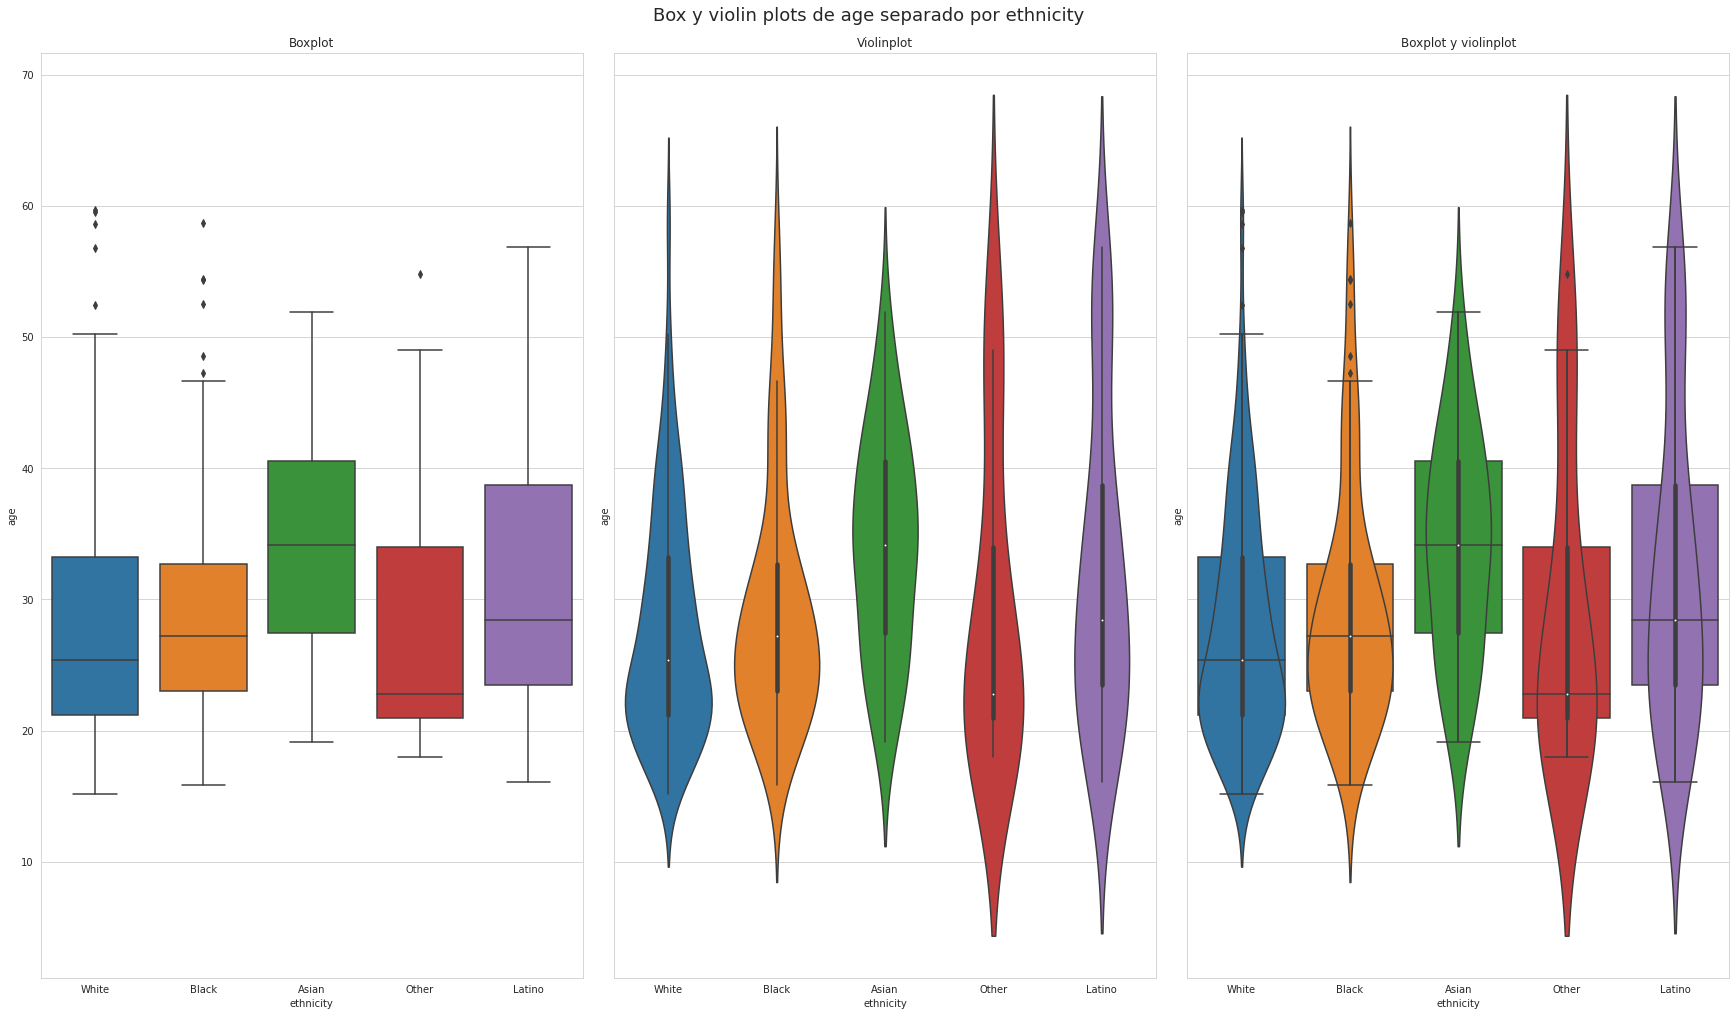

In [196]:
create_box_violin_plots(df_copy, 'age', 'ethnicity')

---
##E. Correlaciones y regresión linear simple - Postwork 4

---
##F. Distribuciones muestrales y técnicas de evaluación de modelos - Postwork 5


---
##G. Visualización de datos avanzada - Postwork 6


---
##H. Pruebas A/B y procesamiento del lenguaje natural - Postwork 7

---
##I. Introducción a Machine Learning - Postwork 8